# Politics vs Climate Research

## Initialization of data

In [2]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [3]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [4]:
config = ConfigLoader.get_config()

In [5]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [6]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN),
    Corpus(source=config["corpora"]["state_of_the_union_corpus"], name="state_of_the_union", language=Language.EN),
#     Corpus(source=config["corpora"]["united_nations_corpus"], name="united_nations", language=Language.EN)
]

In [7]:
from simple_statistics import yearwise_documents
from plot_utils import simple_bar_histogram, multi_bar_histogram

def show_histogram_for_topics(topics=[], normalize_by_year=True, normalize=False, corpus_lengths=[877973, 407961, 221034, 230, 159333], y_scale="linear"):
    if normalize_by_year:
        print('chart is normalized by documents per year!')
    
    mult_years = []
    mult_counts = []
    filtered_corpora = []
    for corpus in corpora:
        
        if normalize_by_year:
            all_years_counts = {}
            all_years, all_counts = yearwise_documents(corpus)
            for i in range(len(all_years)):
                all_years_counts[all_years[i]] = all_counts[i]
        
        corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=topics)
        filtered_corpora.append(corpus)
        
        years, counts = yearwise_documents(corpus)
        mult_years.append(years)
        
        if normalize_by_year:
            normalized_counts = []
            for i, c in enumerate(counts):
                normalized_counts.append(c/all_years_counts[years[i]])
            mult_counts.append(normalized_counts)
        else:
            mult_counts.append(counts)
    multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability", "union__sate", "UN"], normalize=normalize, corpus_lengths=corpus_lengths, y_scale=y_scale)
    
def show_bundestag_histogram_for_topics(topics=[], y_scale="linear"):
    corpus = CorpusFilter.filter(corpus=corpora[0], text_contains_one_of=topics)
    years, counts = yearwise_documents(corpus)
    simple_bar_histogram(years, counts, y_scale=y_scale)

def show_state_of_the_union_for_topics(topics=[], y_scale="linear"):
    corpus = CorpusFilter.filter(corpus=corpora[3], text_contains_one_of=topics)
    years, counts = yearwise_documents(corpus)
    simple_bar_histogram(years, counts, y_scale=y_scale)

## Histograms about topics

chart is normalized by documents per year!


Filtering 'united_nations' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159333/159333 [01:18<00:00, 2020.98it/s]


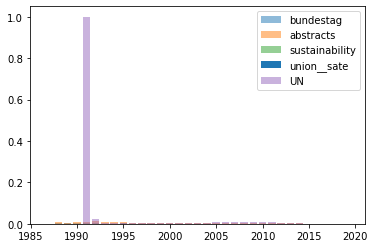

In [34]:
show_histogram_for_topics(["fckw", "cfc"], y_scale="linear")

Filtering 'state_of_the_union' corpus : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 2567.62it/s]


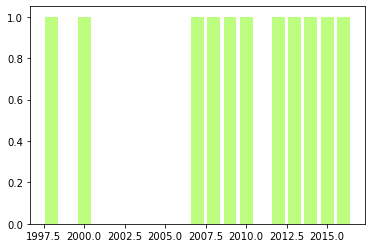

In [17]:
show_state_of_the_union_for_topics(topics=['climate change'])

chart is normalized by documents per year!


Filtering 'united_nations' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159333/159333 [01:58<00:00, 1346.77it/s]


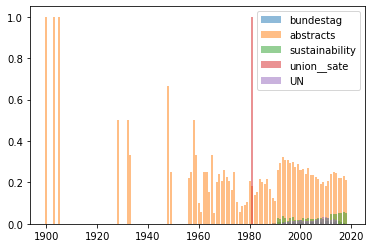

In [33]:
show_histogram_for_topics(["kohlenstoffdioxid", "carbon dioxide", "co2"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 18844.17it/s]


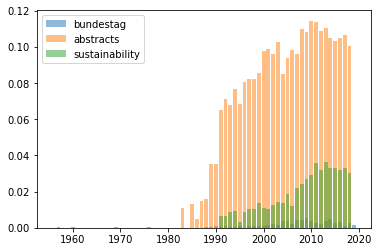

In [9]:
show_histogram_for_topics(["greenhouse gas", "ghg", "treibhausgas", "thg"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 19445.65it/s]


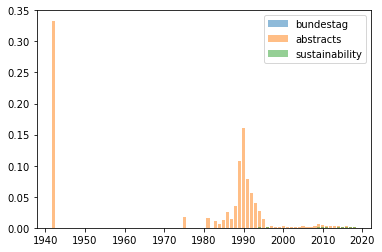

In [10]:
show_histogram_for_topics(["global warming", "globale erwärmung", "globale erwaermung", "globale erwaermung"], y_scale="linear")

Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877973/877973 [00:13<00:00, 67163.26it/s]


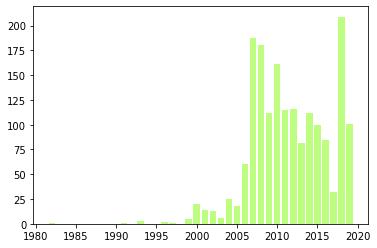

In [11]:
show_bundestag_histogram_for_topics(["klimawandel"], y_scale="linear")

## Histograms about technologies

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:11<00:00, 20028.50it/s]


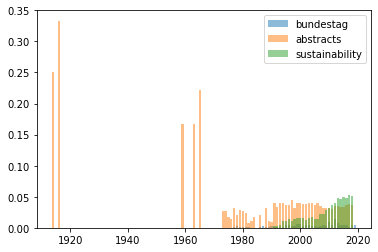

In [12]:
show_histogram_for_topics(["solar", "photovoltaic", "photovoltaik", " pv "], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:06<00:00, 32258.88it/s]


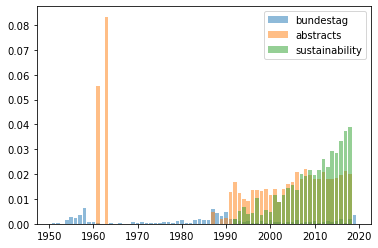

In [13]:
show_histogram_for_topics(["hydrogen", "wasserstoff", " h2 "], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'united_nations' corpus : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159333/159333 [03:49<00:00, 694.04it/s]


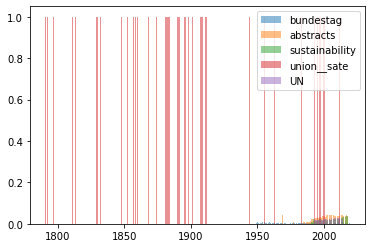

In [35]:
show_histogram_for_topics(["fracturing", "hydrofracking", "fraccing", "fracing", "frac", "fracking"], y_scale="linear")

Filtering 'bundestag' corpus :   0%|                                                                                                                                                                                                            | 0/877973 [00:00<?, ?it/s]

chart is normalized by documents per year!


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:12<00:00, 18020.01it/s]


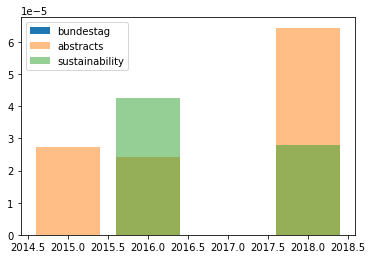

In [15]:
show_histogram_for_topics(["negative emissions", "negative emissions technology", "negativ emission", "negative-emission"], y_scale="linear")

## Keyword matching

In [ ]:
# extract keywords from documents in corpus and assign keywords to documents
filtered_corpora = [CorpusFilter.filter(corpus=corpus, text_contains_one_of=["climate change", "klimawandel", "global warm"]) for corpus in corpora]
# sampled_corpora = [corpus.sample(10, seed=42) for corpus in filtered_corpora]
sampled_corpora = filtered_corpora

In [9]:
sampled_corpora = corpora

In [10]:
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 354.36it/s]


In [50]:
from typing import Dict, Tuple, List, Set
from utils import Document
from collections import defaultdict
from tqdm import tqdm
import math

class KeywordMatcher:
    def __init__(self, corpus_0, corpus_1):
        self.corpus_0 = corpus_0
        self.corpus_1 = corpus_1
        self.matches = None
        self.translations = None
        self.already_matched = False

    @staticmethod
    def lemmatize(keyword_collection: Union[Dict[int, List[Keyword]], List[Document], Corpus], german_model,
                  english_model):
        for instance in tqdm(keyword_collection, total=len(keyword_collection), desc="Lemmatize...", position=0,
                             leave=True):
            if isinstance(keyword_collection, dict):
                keywords = keyword_collection[instance]
            elif isinstance(keyword_collection, list):
                keywords = instance.keywords
            elif isinstance(keyword_collection, Corpus):
                keywords = instance.keywords
            else:
                raise NotImplementedError("Not supported type!")
            for keyword in keywords:
                keyword.lemmatize(german_model, english_model)

    @staticmethod
    def group_by_key(keyword_collection: Union[Dict[int, List[Keyword]], List[Document]],
                     ger_translations: Dict[str, Set[str]] = None,
                     en_translations: Dict[str, Set[str]] = None):
        reversed_keywords = defaultdict(set)
        if ger_translations is None:
            ger_translations = defaultdict(set)
        if en_translations is None:
            en_translations = defaultdict(set)

        for instance in tqdm(keyword_collection, total=len(keyword_collection), desc="Group keys...", position=0,
                             leave=True):

            if isinstance(keyword_collection, dict):
                keywords = keyword_collection[instance]
                identifier = instance
            elif isinstance(keyword_collection, list):
                keywords = instance.keywords
                identifier = instance.doc_id
            elif isinstance(keyword_collection, Corpus):
                keywords = instance.keywords
                identifier = instance.doc_id
            else:
                raise NotImplementedError("Not suppported type!")

            for keyword in keywords:
                if keyword.german_translation is not None and keyword.german_translation != "":
                    reversed_keywords[keyword.german_translation].add(identifier)
                if keyword.english_translation is not None and keyword.english_translation != "":
                    reversed_keywords[keyword.english_translation].add(identifier)

                if keyword.german_translation is not None and keyword.english_translation is not None \
                        and keyword.german_translation != "" and keyword.english_translation != "":
                    ger_translations[keyword.german_translation].add(keyword.english_translation)
                    en_translations[keyword.english_translation].add(keyword.german_translation)

        return reversed_keywords, ger_translations, en_translations

    def match_corpora(self,
                      lemmatize: bool = True,
                      simplify_result: bool = True) \
            -> Tuple[Dict[Keyword, Tuple[List[int], List[int]]], Dict[str, str]]:
        print("Start matching...")
        if lemmatize:
            german_model = spacy.load("de_core_news_sm")
            english_model = spacy.load("en_core_web_sm")
            KeywordMatcher.lemmatize(self.corpus_0, german_model, english_model)
            KeywordMatcher.lemmatize(self.corpus_1, german_model, english_model)

        # groups ids or years by keywords
        reversed_keywords_1, ger_translations, en_translations = KeywordMatcher.group_by_key(self.corpus_0)
        reversed_keywords_2, ger_translations, en_translations = KeywordMatcher.group_by_key(self.corpus_1,
                                                                                             ger_translations,
                                                                                             en_translations)

        # matches years or ids by iterating through keywords in common
        matched_keywords = set()
        for keyword in reversed_keywords_1:
            if keyword in reversed_keywords_2:
                matched_keywords.add(keyword)

        for keyword in reversed_keywords_2:
            if keyword in reversed_keywords_1:
                matched_keywords.add(keyword)
        result_dict = {keyword: (reversed_keywords_1[keyword], reversed_keywords_2[keyword]) for keyword in
                       tqdm(matched_keywords, total=len(matched_keywords), desc="Match...", position=0, leave=True)}

        # uses only english keyword versions
        if simplify_result:
            filtered_result = {}
            for keyword, result in tqdm(result_dict.items(), total=len(result_dict), desc="Simplify..."):
                if keyword in ger_translations.keys():
                    for translation in ger_translations[keyword]:
                        if translation in result_dict.keys():
                            new_result = (
                                result[0].union(result_dict[translation][0]),
                                result[1].union(result_dict[translation][1]))
                            filtered_result[translation] = new_result
                        else:
                            filtered_result[translation] = result
                if keyword in en_translations.keys():
                    filtered_result[keyword] = result_dict[keyword]

            result_dict = filtered_result

        useful_translations = {keyword: translations for keyword, translations in en_translations.items()
                               if keyword in result_dict}
        self.matches = result_dict
        self.already_matched = True
        return result_dict, useful_translations

    @staticmethod
    def get_ngrams_of_matched(matched_corpus_ids,
                              keyword_collection: Union[Dict[int, List[Keyword]], List[Document], Corpus]):
        ngrams = set()

        # for instance in keyword_collection:
        #     if isinstance(keyword_collection, dict):
        #         keywords = keyword_collection[instance]
        #     elif isinstance(keyword_collection, list):
        #         keywords = instance.keywords

        for instance in keyword_collection:
            if isinstance(keyword_collection, dict):
                keywords = keyword_collection[instance]
                identifier = instance
            elif isinstance(keyword_collection, list):
                keywords = instance.keywords
                identifier = instance.doc_id
            elif isinstance(keyword_collection, Corpus):
                keywords = instance.keywords
                identifier = instance.doc_id

            else:
                raise NotImplementedError("Not supported type!")

            if identifier in matched_corpus_ids:
                # todo: add real ngrams?
                # ngrams.update(document.text.split())
                candidates = [keyword.german_translation for keyword in keywords] + \
                             [keyword.english_translation for keyword in keywords]
                ngrams.update(candidates)

        return ngrams

    def get_common_keyword_vocab(self):
        if not self.already_matched:
            raise UserWarning("Not macthed yet, call match_corpora first")
        matched_ids_src1 = set()
        matched_ids_src2 = set()
        for matched_keyword, documents in self.matches.items():
            src1, src2 = documents
            matched_ids_src1.update(src1)
            matched_ids_src2.update(src2)

        ngrams_1 = KeywordMatcher.get_ngrams_of_matched(matched_ids_src1, self.corpus_0)
        ngrams_2 = KeywordMatcher.get_ngrams_of_matched(matched_ids_src2, self.corpus_1)
        # print(ngrams_1.difference(ngrams_2))
        # print(ngrams_2.difference(ngrams_1))
        # print(ngrams_1.intersection(ngrams_2))
        return ngrams_1.intersection(ngrams_2)

    def get_keyword_counts(self, common_keywords, as_dict=False, tf_mode=False):
        if as_dict:
            tuples = {}
        else:
            tuples = []
        for keyword in common_keywords:
            if keyword:
                corp_0_ids, corp_1_ids = self.matches[keyword]
                if tf_mode:
                    corp_0_counts = 0
                    corp_1_counts = 0
                    for doc_id in corp_0_ids:
                        corp_0_counts += self.corpus_0.documents[doc_id].text.count(keyword)
                    for doc_id in corp_1_ids:
                        corp_1_counts += self.corpus_1.documents[doc_id].text.count(keyword)

                else:
                    corp_0_counts = len(corp_0_ids)
                    corp_1_counts = len(corp_1_ids)

                if as_dict:
                    tuples[keyword] = (corp_0_counts, corp_1_counts)
                else:
                    tuples.append((corp_0_counts, corp_1_counts, keyword))

        if not as_dict:
            tuples = sorted(tuples, reverse=True)
        return tuples


    def get_first_mentions(self, common_keywords):
        mentions = {}
        for keyword in common_keywords:
            if keyword:
                corp_0_ids, corp_1_ids = self.matches[keyword]
                corp_0 = [self.corpus_0.documents[corp_id] for corp_id in corp_0_ids]
                corp_1 = [self.corpus_1.documents[corp_id] for corp_id in corp_1_ids]
                years_0 = [doc.date for doc in corp_0]
                years_1 = [doc.date for doc in corp_1]
                mentions[keyword] = (min(years_0), min(years_1))
        return mentions

    def liklihood_ratio_test(self, term: str, keyword_counts: Dict[str, Tuple[int, int]], n_1: int, n_2: int) -> float:
        # k = term freq
        # n = all freq
        def liklihood(prob: float, k: int, n: int) -> float:
            res = (prob ** k) * (1 - prob) ** (n - k)
            if res == 0:
                res = 0.000000000000001
            return res

        k_1 = keyword_counts[term][0]
        k_2 = keyword_counts[term][1]

        p_1 = k_1 / n_1
        p_2 = k_2 / n_2
        p = (k_1 + k_2) / (n_1 + n_2)
        return 2 * (math.log(liklihood(p_1, k_1, n_1)) + math.log(liklihood(p_2, k_2, n_2))
                    - math.log(liklihood(p, k_1, n_1)) - math.log(liklihood(p, k_2, n_2)))

    def perform_liklihood_ratio_test(self) -> List[Tuple[str, float]]:
        # todo: think of actually keyword frequencies
        common = self.get_common_keyword_vocab()
        keyword_counts = self.get_keyword_counts(common, as_dict=True, tf_mode=True)
        n_1 = 0
        n_2 = 0
        for keyword, counts in keyword_counts.items():
            n_1 += counts[0]
            n_2 += counts[1]

        ranked_terms = [(term, self.liklihood_ratio_test(term, keyword_counts, n_1, n_2)) for term in common if term]
        ranked_terms = sorted(ranked_terms, key=lambda x: x[1], reverse=True)
        return ranked_terms

In [51]:
km = KeywordMatcher(sampled_corpora[1], sampled_corpora[3])
km.match_corpora(lemmatize=False, simplify_result=False)
common = km.get_common_keyword_vocab()
km.get_first_mentions(common)

Group keys...:   2%|████                                                                                                                                                                                                          | 2796/142562 [00:00<00:05, 27935.78it/s]

Start matching...


Match...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4856/4856 [00:00<00:00, 808652.89it/s]


{'20 percent': (1998, 2000),
 'become much frequent': (1993, 2000),
 'eradicate extreme poverty': (2010, 2015),
 '20 billion': (2016, 2010),
 'energy waste': (2003, 2013),
 'equivalent': (1991, 2000),
 'kind': (1991, 1998),
 'country dominate': (2018, 2013),
 'coverage': (1993, 1998),
 'invade': (1991, 2015),
 'call home': (2018, 1998),
 'texas': (1991, 2015),
 'regulations': (2010, 2009),
 'memory': (1992, 1999),
 'treaty': (1991, 1998),
 'everyone play': (2016, 2012),
 'term': (1986, 2009),
 'earth': (1942, 1998),
 'sign': (1983, 1998),
 'business investment': (2012, 2008),
 'gasoline': (1991, 2007),
 'voluntary choice': (2017, 2000),
 'three area': (1990, 2009),
 'argument': (1993, 2007),
 'global community': (1993, 2000),
 'sanctuary': (1998, 2008),
 'companies': (2002, 2016),
 'handgun': (2011, 1999),
 'warm year': (1989, 2015),
 'affordable healthcare': (2008, 2000),
 'late technology': (2012, 1999),
 'affordable house': (2013, 1999),
 'well product': (2006, 2012),
 'aid': (1992,

In [52]:
km.perform_liklihood_ratio_test()

[('climate', 734.2656671385939),
 ('model', 723.8688908968637),
 ('study', 639.1730533883183),
 ('temperature', 608.1724283102467),
 ('increase', 582.7577832854749),
 ('terrorist', 551.1706683454227),
 ('effect', 520.8247215123571),
 ('5', 511.7861953198371),
 ('impact', 498.74978569784315),
 ('ty', 479.17923560024565),
 ('sure', 476.8422110937122),
 ('earn', 470.37479549261593),
 ('--', 464.1283460904405),
 ('make sure', 399.83450515669676),
 ('ready', 375.23109166155336),
 ('son', 366.6988941796808),
 ('result', 363.17993891726377),
 ('3', 348.7173098076364),
 ('leg', 329.94772038272254),
 ('fight', 329.6031732232161),
 ('kid', 322.6145282768449),
 ('water', 318.2504847658599),
 ('safe', 317.03853971314084),
 ('courage', 316.1099967774343),
 ('vote', 308.581723229712),
 ('heal', 307.93171314713345),
 ('gun', 303.77684499217276),
 ('send', 301.81283511256265),
 ('rig', 294.91154501325104),
 ('4', 290.50663684302896),
 ('health care', 289.67896426465904),
 ('heir', 289.0253997425805),


In [29]:
km.get_keyword_counts(common)

[(73776, 8, 'climate change'),
 (35817, 12, 'use'),
 (30143, 3, 'c'),
 (25604, 2, 'study'),
 (23168, 8, '2'),
 (23053, 6, 'increase'),
 (23009, 12, 'change'),
 (22364, 10, 'result'),
 (21021, 7, '1'),
 (20219, 3, 'effect'),
 (19628, 4, 'impact'),
 (17755, 12, 'good'),
 (17436, 9, 'find'),
 (16410, 3, 'global warm'),
 (15389, 6, '3'),
 (13450, 2, 'model'),
 (13154, 1, 'temperature'),
 (13144, 12, 'time'),
 (13086, 2, 'climate'),
 (13028, 1, 'e'),
 (12869, 9, 'show'),
 (12618, 3, 'response'),
 (12317, 11, 'long'),
 (12271, 9, 'high'),
 (12194, 12, 'need'),
 (12148, 12, 'one'),
 (12065, 1, '5'),
 (11261, 1, 'compare'),
 (10957, 8, 'understand'),
 (10683, 5, 'order'),
 (10645, 7, 'region'),
 (10294, 5, '4'),
 (9892, 2, 'consider'),
 (9821, 1, 'suggest'),
 (9659, 12, 'much'),
 (9463, 1, 'paper'),
 (9333, 7, 'low'),
 (9199, 6, 'development'),
 (8718, 4, 'base'),
 (8522, 8, 'provide'),
 (8449, 12, 'lead'),
 (8305, 1, 'apply'),
 (8289, 5, 'influence'),
 (8285, 1, 'term'),
 (8253, 7, 'also'),
 

In [ ]:
import re
def remove_punctuation(corpus: Corpus):
    for d in corpus.get_documents():
        res = re.sub(r'[^a-zA-ZäöüÖÄÜß\-\s\.!\?]', '', d.text)
        res = re.sub(r' +', ' ', res)
        d.text = res
    

remove_punctuation(sampled_corpora[0])

In [ ]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(kwt, restrict_per_document=10)

# sampled_corpora[2].get_documents()[0].keywords

In [ ]:
for corpus in sampled_corpora[:]:
    print(corpus.translate_keywords(kwt, restrict_per_document=1))

# sampled_corpora[2].get_documents()[0].keywords

In [ ]:
sampled_corpora[0].get_documents()[0].keywords

In [ ]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

In [ ]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))

,Config,TF Precision,DF Precision,TF Recall,DF Recall,TF F-measure,DF F-measure,Algorithm,Source1,Source2,Yearwise
0,rake abstract bundestag yearwise an.csv,0.191781,0.191781,0.036269,0.036269,0.061002,0.061002,rake,abstract,bundestag,True
1,rake abstract sustainability an.csv,0.600000,0.720000,0.155440,0.186528,0.246914,0.296296,rake,abstract,sustainability,False
2,rake state of the union abstract an.csv,0.220000,0.130000,0.056995,0.033679,0.090535,0.053498,rake,abstract,state_of_the_union,False
3,rake state of the union abstract yearwise an.csv,0.170000,0.180000,0.044041,0.046632,0.069959,0.074074,rake,abstract,state_of_the_union,True
4,rake state of the union bundestag yearwise an.csv,0.010000,0.030000,0.002591,0.007772,0.004115,0.012346,rake,state_of_the_union,bundestag,True
5,rake state of the union sustainability an.csv,0.040000,0.040000,0.010363,0.010363,0.016461,0.016461,rake,state_of_the_union,sustainability,False
6,rake state of the union sustainability yearwis...,0.100000,0.080000,0.025907,0.020725,0.041152,0.032922,rake,state_of_the_union,sustainability,True
7,rake sustainability abstract yearwise an.csv,0.470000,0.270000,0.121762,0.069948,0.193416,0.111111,rake,abstract,sustainability,True
8,rake sustainability bundestag yearwise an.csv,0.375000,0.375000,0.015544,0.015544,0.029851,0.029851,rake,bundestag,sustainability,True
9,text rank abstract state of the union an.csv,0.150000,0.150000,0.038860,0.038860,0.061728,0.061728,textrank,abstract,state_of_the_union,False


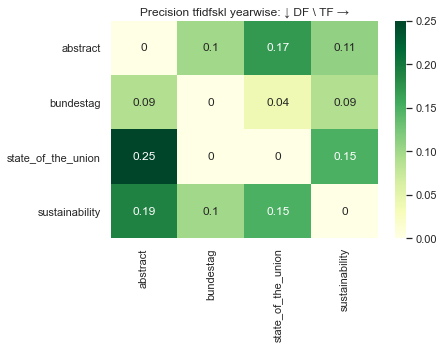

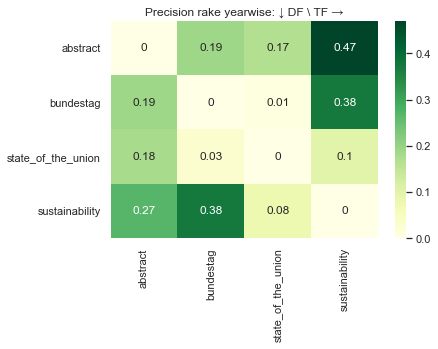

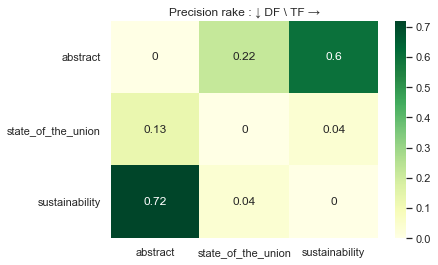

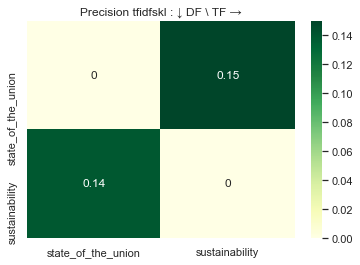

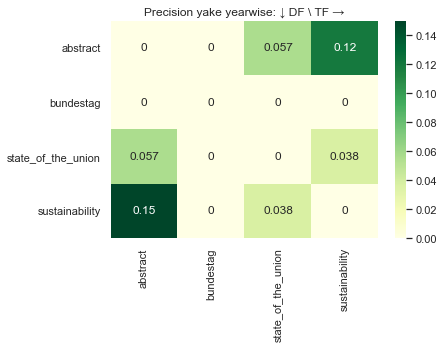

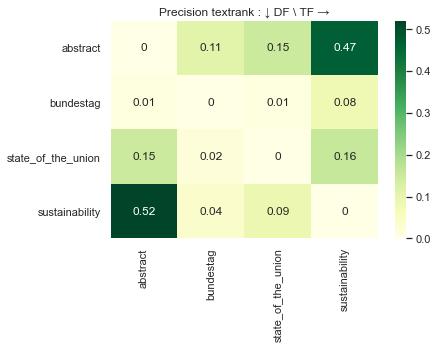

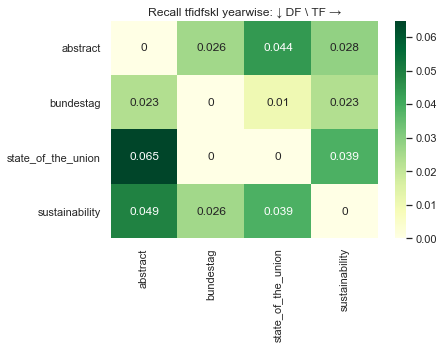

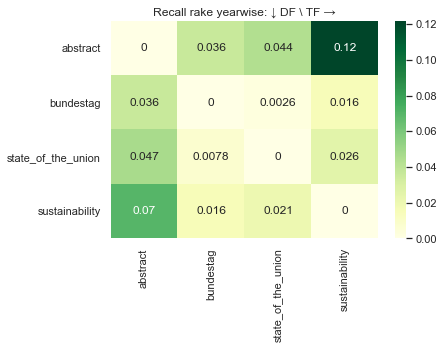

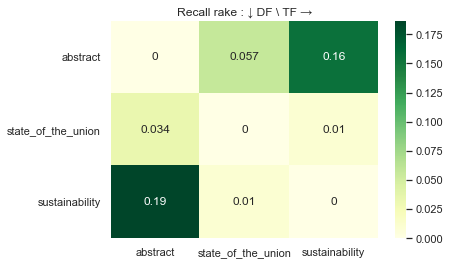

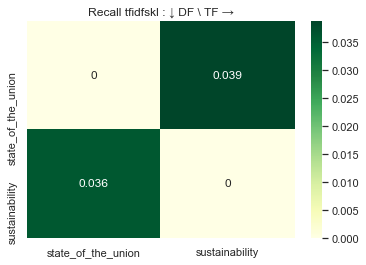

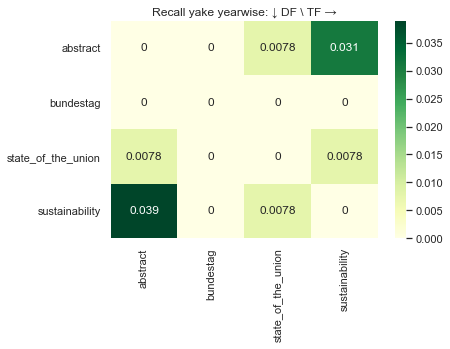

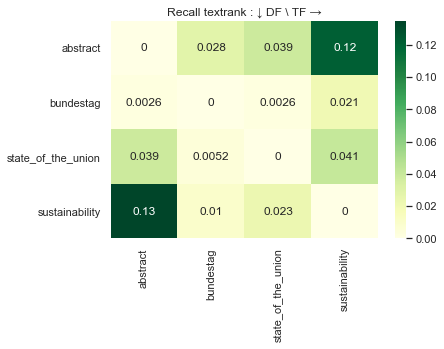

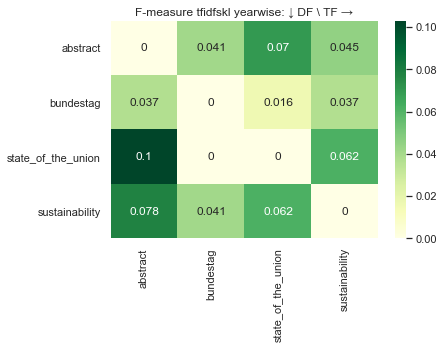

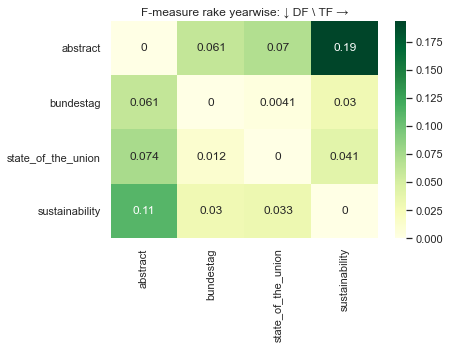

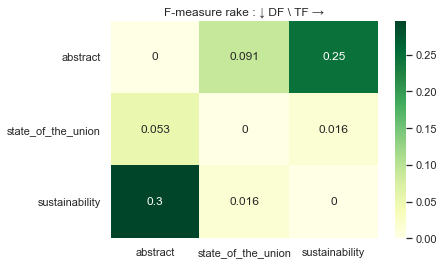

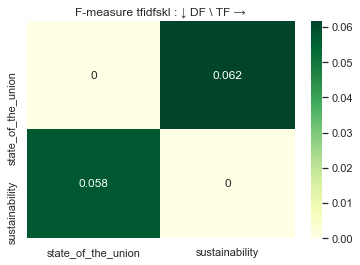

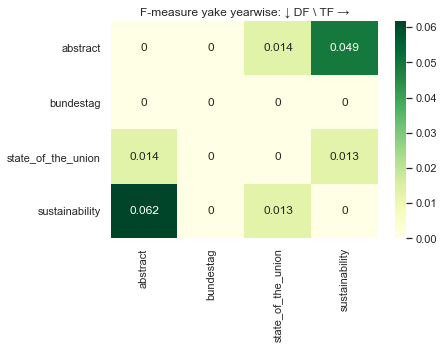

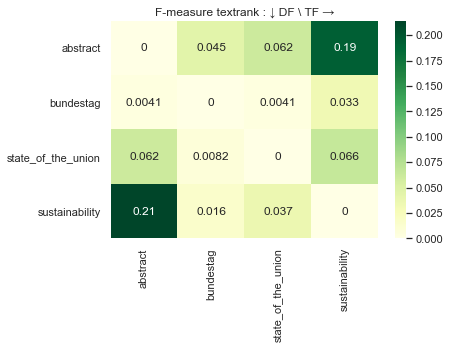

In [9]:
from collections import defaultdict
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd



def heatmap(df, algorithm, metric="Precision", yearwise=True):
    df_f = df.loc[df["Yearwise"]==yearwise]
    df_f = df_f.loc[df["Algorithm"]==algorithm]
#     display(df_f)
    res = {}
    sources = set()
    for i, row in df_f.iterrows():
        res[(row["Source1"], row["Source2"])] = (row[f"TF {metric}"], row[f"DF {metric}"])
        res[(row["Source2"], row["Source1"])] = (row[f"TF {metric}"], row[f"DF {metric}"])
        sources.add(row["Source1"])
        sources.add(row["Source2"])
    res

    sources = list(sources)
    sources.sort()
    matrix = []

    for i, source in enumerate(sources):
        inner_matrix = []
        for j, other_source in enumerate(sources):
            tup = (source, other_source)
            if i > j:
                index = 1
            else:
                index = 0
            tf_df = res.get(tup)
            if not tf_df:
                tf_df = (0, 0)

            inner_matrix.append(tf_df[index])
        matrix.append(np.array(inner_matrix))

    matrix = np.array(matrix)
    ax = plt.axes()
    ax = sns.heatmap(matrix, xticklabels=sources, yticklabels=sources, annot=True, cmap="YlGn", ax = ax)
    ax.set_title(f'{metric} {algorithm} {"yearwise" if yearwise else ""}: ↓ DF \ TF →')
    plt.show()

df = pd.read_csv('data/evaluation/precision.csv')
display(df)
heatmap(df, "tfidfskl", yearwise=True)
heatmap(df, "rake", yearwise=True)
heatmap(df, "rake", yearwise=False)
heatmap(df, "tfidfskl", yearwise=False)
heatmap(df, "yake", yearwise=True)
heatmap(df, "textrank", yearwise=False)

heatmap(df, "tfidfskl", metric="Recall", yearwise=True)
heatmap(df, "rake", metric="Recall", yearwise=True)
heatmap(df, "rake", metric="Recall", yearwise=False)
heatmap(df, "tfidfskl", metric="Recall", yearwise=False)
heatmap(df, "yake", metric="Recall", yearwise=True)
heatmap(df, "textrank", metric="Recall", yearwise=False)

heatmap(df, "tfidfskl", metric="F-measure", yearwise=True)
heatmap(df, "rake", metric="F-measure", yearwise=True)
heatmap(df, "rake", metric="F-measure", yearwise=False)
heatmap(df, "tfidfskl", metric="F-measure", yearwise=False)
heatmap(df, "yake", metric="F-measure", yearwise=True)
heatmap(df, "textrank", metric="F-measure", yearwise=False)